In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('dataset.csv')

### Research Questions

* What is the organization with the hightest profits over the two years
* Which locations have the highest profit
* What is the relationship between the 

## Data Cleaning

#### Re-formatting the Dataset Headers to all lower_case

In [19]:
new_columns = [row.lower().rstrip().replace(' ', '_') for row in list(data.columns)]

In [20]:
data.columns = new_columns

In [21]:
data.columns

Index(['smes', 'location', 'activity', 'turnover_2018_(pounds_in_millions)',
       'turnover_2019_(pounds_in_millions)',
       'pre-tax_profit_2018_(pounds_in_millions)',
       'pre-tax_profit_2019_(pounds_in_millions)',
       'tax_2018_(pounds_in_millions)', 'tax_2019_(pounds_in_millions)',
       'no_of_employee_2018', 'no_of_employee_2019', 'unnamed:_11',
       'unnamed:_12', 'unnamed:_13', 'unnamed:_14', 'unnamed:_15',
       'unnamed:_16'],
      dtype='object')

### Checking for Missing Values

In [16]:
data.isnull().sum()

smes                                          2
location                                      2
activity                                      2
turnover_2018_(pounds_in_millions)            2
turnover_2019_(pounds_in_millions)            2
pre-tax_profit_2018_(pounds_in_millions)      2
pre-tax_profit_2019_(pounds_in_millions)      2
tax_2018_(pounds_in_millions)                 2
tax_2019_(pounds_in_millions)                 2
no_of_employee_2018                           2
no_of_employee_2019                           2
unnamed:_11                                 200
unnamed:_12                                 200
unnamed:_13                                 200
unnamed:_14                                 200
unnamed:_15                                 200
unnamed:_16                                 200
dtype: int64

### Dropping the missing values

In [24]:
## Dropping the missing values by column and a threshold of 3.

data.dropna(axis=1, thresh=1, inplace=True)

### Dropping additional missing values by rows using a threshold of zero

In [26]:
data.dropna(axis=0, thresh=1, inplace=True)

In [9]:
data['activity'] = data['activity'].str.lower().str.replace(' ','_').str.strip()

In [35]:
data

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018,profits_for_2019,profts_for_two_years
0,HERITAGE (NORTH WALES),Bangor,Property development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0,5.31,5.88,11.19
1,ITEC TRAINING SOLUTIONS,Cardiff,Training provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0,1.74,1.85,3.59
2,CARPENTER & PATERSON,Welshpool,Pipe supports,12.4,16.12,1.2,1.3,0.16,0.21,44.0,44.0,1.04,1.09,2.13
3,MARLIN INDUSTRIES,Wrexham,Timber based packaging for cables,12.6,16.38,0.9,2.0,0.12,0.32,43.0,43.0,0.78,1.68,2.46
4,GROUNDHOG,Neath,Secure containers,9.1,11.83,2.1,3.0,0.27,0.48,34.0,34.0,1.83,2.52,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Milner,Rotherham,Sale of motor vehicle components,10112.0,13145.60,906.0,10112.0,117.78,1617.92,73.0,73.0,788.22,8494.08,9282.30
194,Fosters Bakery,Sheffield,Bakers and confectioners,13396.0,17414.80,906.0,13396.0,117.78,2143.36,90.0,90.0,788.22,11252.64,12040.86
195,AEW Paddock Motors,Matlock,Retailing of vehicle spares and property devel...,9774.0,12706.20,886.0,9774.0,115.18,1563.84,78.0,78.0,770.82,8210.16,8980.98
196,Paragon Foodservice,Barnsley,Distribution of deep frozen foods,13383.0,17397.90,886.0,13383.0,115.18,2141.28,204.0,204.0,770.82,11241.72,12012.54


In [29]:
data.head(5)

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019
0,HERITAGE (NORTH WALES),Bangor,Property development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0
1,ITEC TRAINING SOLUTIONS,Cardiff,Training provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0
2,CARPENTER & PATERSON,Welshpool,Pipe supports,12.4,16.12,1.2,1.3,0.16,0.21,44.0,44.0
3,MARLIN INDUSTRIES,Wrexham,Timber based packaging for cables,12.6,16.38,0.9,2.0,0.12,0.32,43.0,43.0
4,GROUNDHOG,Neath,Secure containers,9.1,11.83,2.1,3.0,0.27,0.48,34.0,34.0


In [30]:
data['profits_for_2018'] = data['pre-tax_profit_2018_(pounds_in_millions)'] - data['tax_2018_(pounds_in_millions)']
data.head(2)

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018
0,HERITAGE (NORTH WALES),Bangor,Property development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0,5.31
1,ITEC TRAINING SOLUTIONS,Cardiff,Training provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0,1.74


In [31]:
data['profits_for_2019'] = data['pre-tax_profit_2019_(pounds_in_millions)'] - data['tax_2019_(pounds_in_millions)']
data.head(2)

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018,profits_for_2019
0,HERITAGE (NORTH WALES),Bangor,Property development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0,5.31,5.88
1,ITEC TRAINING SOLUTIONS,Cardiff,Training provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0,1.74,1.85


In [32]:
data['profts_for_two_years'] = data['profits_for_2018'] + data['profits_for_2019']

In [34]:
data.head(4)

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018,profits_for_2019,profts_for_two_years
0,HERITAGE (NORTH WALES),Bangor,Property development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0,5.31,5.88,11.19
1,ITEC TRAINING SOLUTIONS,Cardiff,Training provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0,1.74,1.85,3.59
2,CARPENTER & PATERSON,Welshpool,Pipe supports,12.4,16.12,1.2,1.3,0.16,0.21,44.0,44.0,1.04,1.09,2.13
3,MARLIN INDUSTRIES,Wrexham,Timber based packaging for cables,12.6,16.38,0.9,2.0,0.12,0.32,43.0,43.0,0.78,1.68,2.46


In [39]:
data['activity'] = data['activity'].str.lower().str.replace(' ','_')

In [40]:
del data['acitivity']

### SMEs with the highest profit over the two years

In [61]:
top_smes = data.groupby('smes')['profts_for_two_years'].sum().sort_values(ascending=False).head(5)

In [62]:
top_smes = top_smes.reset_index(None)

In [63]:
top_smes

,smes,profts_for_two_years
0,Datagraphic,45863.64
1,Tours Abroad Group,35302.44
2,Galaxy Insulation And DRY Lining,32900.13
3,Utopia,31600.35
4,HRE Newco,31307.43


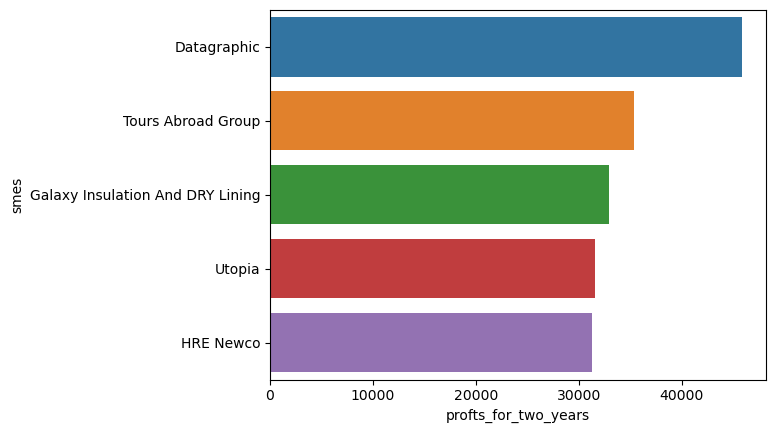

In [82]:
sns.barplot(y=top_smes['smes'], x=top_smes['profts_for_two_years'])
plt.show()

#### Locations with the Highest Profit

In [76]:
top_locations_by_profit = data.groupby('location')['profts_for_two_years'].sum().sort_values(ascending=False).head(5)

In [77]:
top_locations_by_profit = top_locations_by_profit.reset_index()

In [80]:
top_locations_by_profit

,location,profts_for_two_years
0,Sheffield,447497.91
1,Doncaster,320135.34
2,Rotherham,270436.20
3,Barnsley,267890.88
4,Chesterfield,203536.11


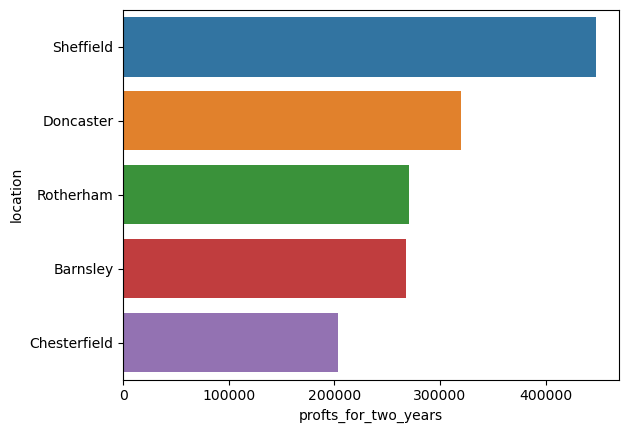

In [81]:
sns.barplot(y=top_locations_by_profit['location'], x=top_locations_by_profit['profts_for_two_years'])
plt.show()

### Descriptive Statistics of the dataset

In [86]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
turnover_2018_(pounds_in_millions),198.0,9532.420707,11567.415059,7.20,12.0000,130.700,17654.0000,53539.00
turnover_2019_(pounds_in_millions),198.0,12392.146919,15037.639577,9.36,15.6000,169.910,22950.2000,69600.70
pre-tax_profit_2018_(pounds_in_millions),198.0,928.043434,1142.363247,0.30,1.0000,13.450,1642.2500,5076.00
pre-tax_profit_2019_(pounds_in_millions),198.0,9594.794444,11562.666440,0.20,1.6000,24.700,17654.0000,53539.00
tax_2018_(pounds_in_millions),198.0,120.645808,148.507090,0.04,0.1300,1.745,213.4925,659.88
tax_2019_(pounds_in_millions),198.0,1535.167222,1850.026538,0.03,0.2600,3.955,2824.6400,8566.24
no_of_employee_2018,198.0,68.156566,57.499245,4.00,31.2500,50.500,83.7500,334.00
no_of_employee_2019,198.0,68.156566,57.499245,4.00,31.2500,50.500,83.7500,334.00
profits_for_2018,198.0,807.397626,993.856157,0.26,0.8700,11.705,1428.7575,4416.12
profits_for_2019,198.0,8059.627222,9712.639902,0.17,1.3400,20.745,14829.3600,44972.76


#### Relationship between the number of employees and profit (2018)

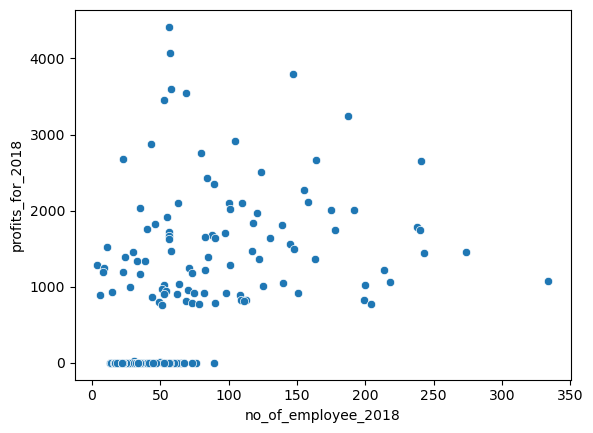

In [89]:
sns.scatterplot(x="no_of_employee_2018", y="profits_for_2018", data=data)
plt.show()

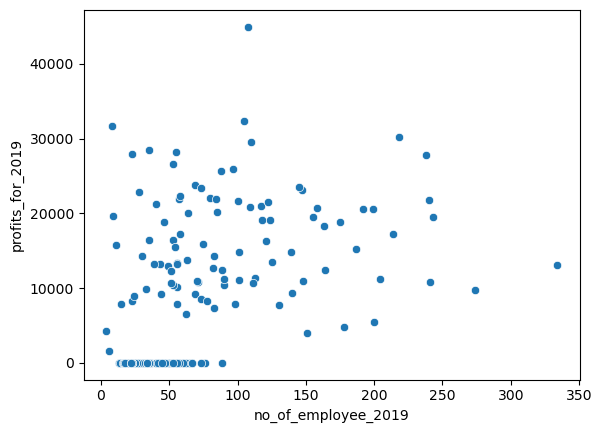

In [90]:
sns.scatterplot(x="no_of_employee_2019", y="profits_for_2019", data=data)
plt.show()

In [92]:
data.corr().transpose()

,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018,profits_for_2019,profts_for_two_years
turnover_2018_(pounds_in_millions),1.000000,1.000000,0.757419,0.996555,0.757419,0.996555,0.488899,0.488899,0.757419,0.996555,0.994851
turnover_2019_(pounds_in_millions),1.000000,1.000000,0.757419,0.996555,0.757419,0.996555,0.488899,0.488899,0.757419,0.996555,0.994851
pre-tax_profit_2018_(pounds_in_millions),0.757419,0.757419,1.000000,0.757891,1.000000,0.757891,0.465186,0.465186,1.000000,0.757891,0.796779
pre-tax_profit_2019_(pounds_in_millions),0.996555,0.996555,0.757891,1.000000,0.757891,1.000000,0.487620,0.487620,0.757891,1.000000,0.998087
tax_2018_(pounds_in_millions),0.757419,0.757419,1.000000,0.757891,1.000000,0.757891,0.465186,0.465186,1.000000,0.757891,0.796779
tax_2019_(pounds_in_millions),0.996555,0.996555,0.757891,1.000000,0.757891,1.000000,0.487620,0.487620,0.757891,1.000000,0.998087
no_of_employee_2018,0.488899,0.488899,0.465186,0.487620,0.465186,0.487620,1.000000,1.000000,0.465186,0.487620,0.495750
no_of_employee_2019,0.488899,0.488899,0.465186,0.487620,0.465186,0.487620,1.000000,1.000000,0.465186,0.487620,0.495750
profits_for_2018,0.757419,0.757419,1.000000,0.757891,1.000000,0.757891,0.465186,0.465186,1.000000,0.757891,0.796779
profits_for_2019,0.996555,0.996555,0.757891,1.000000,0.757891,1.000000,0.487620,0.487620,0.757891,1.000000,0.998087


# Data Preparation

In [93]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)